# Drugie duże zadanie zaliczeniowe na laboratorium

In [140]:
!pip install optuna

In [141]:
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, r2_score, f1_score, classification_report
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.ensemble import RandomForestClassifier
import optuna
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
import plotly.express as px
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn .linear_model import ElasticNet

In [142]:
df = pd.read_csv('zad2_wum_data_for_students.csv', sep=';')
df

,Class,Output,Input1,Input2,Input3,Input4,Input5,Input6,Input7,Input8,...,Input391,Input392,Input393,Input394,Input395,Input396,Input397,Input398,Input399,Input400
0,0,0.800586,-0.002583,2.184037,-0.322008,1.621241,1.192444,-0.278356,-0.207366,0.735689,...,-2.140861,1.187660,0.345238,-0.844885,0.580007,-2.605781,-0.299471,0.711487,-0.753316,0.728763
1,0,2.168475,0.668637,1.373933,-0.476868,-0.724704,0.031162,-1.845921,0.784890,1.508526,...,-1.286120,-0.900044,-0.500399,-0.126421,-0.632233,-2.557419,0.056044,0.634774,-0.259835,0.106390
2,1,-1.210777,-0.681438,-0.544753,0.441346,-0.019906,-0.192135,-0.162510,-0.998777,0.686472,...,-0.391605,-0.190147,0.793746,-0.812737,-0.068228,-0.313143,2.564096,0.848355,0.180556,-1.525615
3,1,0.505678,-0.497957,0.720712,0.149120,0.019251,1.377850,0.981337,-0.846813,0.036790,...,-0.176734,-0.947351,-0.888601,1.509450,-0.501929,-0.554909,-0.104051,0.442150,-0.056644,1.447267
4,1,-10.281033,-1.178544,0.176941,1.112202,1.234189,0.999451,-0.773329,-0.811075,1.550537,...,-0.181325,0.198960,-0.697497,-0.836371,1.652071,0.974292,1.584071,-0.202352,1.362426,1.023857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,-4.298039,-0.893128,2.081556,0.796121,0.436108,-0.849635,1.129482,1.432813,-0.438694,...,-0.474294,0.039143,1.808243,-0.034847,-1.314878,-1.235939,1.010456,-2.186403,-0.157829,0.738539
1996,1,-0.431692,0.048336,0.770285,-0.354350,-1.557706,-0.182954,-0.665730,0.322526,0.658221,...,1.087032,0.095401,0.301200,1.776995,-2.045261,-1.931008,-0.683551,0.000835,-0.671151,-0.945843
1997,1,-0.056681,1.404051,-0.061405,0.180448,-0.362992,0.826353,-0.066654,0.987946,-1.266302,...,1.011431,0.458901,-0.220498,0.004950,-1.928972,-1.574129,1.421012,-0.736559,-0.540174,-1.182067
1998,0,-0.983396,-0.474238,-1.288631,-0.326170,-0.275383,-0.315331,-1.225622,-0.656750,0.777151,...,-1.146012,-0.031477,-2.461869,1.037240,0.366076,-0.541171,-0.126733,-0.265069,-0.080381,0.166985


In [143]:
df.describe()

,Class,Output,Input1,Input2,Input3,Input4,Input5,Input6,Input7,Input8,...,Input391,Input392,Input393,Input394,Input395,Input396,Input397,Input398,Input399,Input400
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.506500,0.106647,-0.005665,-0.016681,-0.005334,0.003488,0.002534,0.006839,-0.012273,-0.020030,...,-0.019331,0.029074,0.020895,-0.016766,-0.007556,0.010091,0.007851,0.012891,0.004650,-0.013988
std,0.500083,3.562855,0.999429,1.010284,0.991542,0.987569,0.999472,1.008721,1.005626,1.002895,...,0.994439,1.000463,0.988078,0.994856,0.983238,0.996567,0.987002,0.995252,0.999906,0.997836
min,0.000000,-12.384019,-4.040194,-3.119465,-2.978635,-3.667101,-3.466724,-3.230187,-3.686750,-2.971715,...,-4.003626,-3.415436,-3.233725,-3.292675,-3.572882,-3.416226,-2.804361,-3.384484,-3.493723,-3.369950
25%,0.000000,-2.310265,-0.652010,-0.704739,-0.649305,-0.657961,-0.662386,-0.656393,-0.670924,-0.702121,...,-0.682235,-0.637035,-0.644477,-0.687878,-0.648976,-0.720322,-0.670621,-0.644547,-0.665419,-0.690380
50%,1.000000,0.140658,0.001009,-0.058297,0.025890,0.000425,-0.037171,0.020573,0.000160,-0.006156,...,0.013317,0.027436,0.019631,-0.009518,-0.006203,0.051022,0.029848,0.042120,0.022766,-0.012325
75%,1.000000,2.435991,0.639342,0.581323,0.676253,0.648669,0.684755,0.687058,0.664702,0.668752,...,0.642293,0.732498,0.679480,0.678636,0.659516,0.777529,0.660940,0.700344,0.680525,0.674120
max,1.000000,11.676146,3.370270,5.357014,3.674250,3.872662,3.507387,3.038254,3.764414,3.466016,...,3.601507,4.390463,3.150263,3.123106,3.294423,2.962170,3.069878,3.331561,3.054563,3.129274


# Baseline models

### Regresja

In [144]:
def base_regression(df):
  X = np.array(df.drop(['Class', 'Output'], axis=1))
  Y = np.array(df[['Output']])

  xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

  xtrain_const = sm.add_constant(xtrain)
  lr = sm.OLS(ytrain, xtrain_const)
  results = lr.fit()
  print(results.summary())

  ypred_train = results.predict(xtrain_const)
  train_mse = mean_squared_error(ytrain, ypred_train)
  train_rmse =  np.sqrt(mean_squared_error(ytrain, ypred_train))
  print("\nMeasures for training set")
  print(f"(MSE) Mean squared error: {train_mse:.3f}")
  print(f"(RMSE) Root mean squared error: {train_rmse:.3f}")

  xtest_const = sm.add_constant(xtest)
  ypred_test = results.predict(xtest_const)
  test_mse = mean_squared_error(ytest, ypred_test)
  test_rmse =  np.sqrt(mean_squared_error(ytest, ypred_test))
  print("\nMeasures for test set")
  print(f"(MSE) Mean squared error: {test_mse:.3f}")
  print(f"(RMSE) Root mean squared error: {test_rmse:.3f}")

  print(f"Difference between test and train MSE: {(test_mse - train_mse):.3f}")
  print(f"Difference between test and train RMSE: {(test_rmse - train_rmse):.3f}")

  print(f"Training R^2: {r2_score(ytrain, ypred_train):.3f}")
  print(f"Test R^2: {r2_score(ytest, ypred_test):.3f}")

base_regression(df)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     5.047
Date:                Mon, 02 Jun 2025   Prob (F-statistic):          2.20e-103
Time:                        18:45:40   Log-Likelihood:                -3538.3
No. Observations:                1600   AIC:                             7849.
Df Residuals:                    1214   BIC:                             9924.
Df Model:                         385                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1446      0.067      2.144      0.0

Widzimy, że różnica w `RMSE` między zbiorem treningowym, a testowym to ok. `1.9%` zakresu `Y`, więc to dużo nie jest, ale `R^2` w zbiorze treningowym jest trochę wyższa niż dla zbioru testowego, co może świadczyć o tym, że model nie generalizuje do końca dobrze. Gorzej radzi sobie z danymi testowymi. To znaczy, że mamy tu delikatny **overfitting**.

Występuje tu także **underfitting**, ponieważ `R^2` nie jest duże na zbiorze treningowym.

### Klasyfikacja

In [145]:
def base_classification(df):
  X = np.array(df.drop(['Class', 'Output'], axis=1))
  Y = np.array(df[['Class']])

  xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

  lr = LogisticRegression().fit(xtrain, ytrain)

  ypred_train = lr.predict(xtrain)
  ypred_test = lr.predict(xtest)

  print("Measures for training set")
  print(f"Classification report: \n{classification_report(ytrain, ypred_train)}")

  print("\nMeasures for test set")
  print(f"Classification report: \n{classification_report(ytest, ypred_test)}")

base_classification(df)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Measures for training set
Classification report: 
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       785
           1       0.74      0.75      0.75       815

    accuracy                           0.74      1600
   macro avg       0.74      0.74      0.74      1600
weighted avg       0.74      0.74      0.74      1600


Measures for test set
Classification report: 
              precision    recall  f1-score   support

           0       0.53      0.47      0.49       202
           1       0.51      0.57      0.54       198

    accuracy                           0.52       400
   macro avg       0.52      0.52      0.52       400
weighted avg       0.52      0.52      0.52       400



* Duża różnica pomiędzy treningowym accuracy (`74%`), a testowym (`52%`)
* `Precision` i `recall` są niskie zarówno dla treningowego zbioru, jak i testowego

Tutaj możemy zaobserwować **overfitting**. Model radzi sobie zdecydowanie słabiej na testowym zbiorze w porównaniu do zbioru treningowego.

## Bardziej zaawansowana klasyfikacja

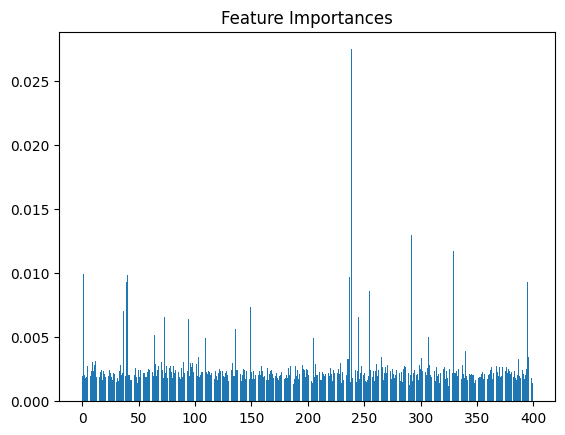

[I 2025-06-02 18:45:53,639] A new study created in memory with name: no-name-6143d3cf-3230-42b1-b83e-dfeac83cfa5e
[I 2025-06-02 18:46:07,778] Trial 0 finished with value: 0.6003154739996845 and parameters: {'k': 23, 'C': 38.57435496902186, 'gamma': 0.0031067193799950866}. Best is trial 0 with value: 0.6003154739996845.
[I 2025-06-02 18:46:12,132] Trial 1 finished with value: 0.5531649636912794 and parameters: {'k': 21, 'C': 0.22518863034218248, 'gamma': 0.0008842550759683997}. Best is trial 0 with value: 0.6003154739996845.
[I 2025-06-02 18:46:16,914] Trial 2 finished with value: 0.7504933662828401 and parameters: {'k': 12, 'C': 70.82023580407028, 'gamma': 0.026032932052262286}. Best is trial 2 with value: 0.7504933662828401.
[I 2025-06-02 18:46:21,853] Trial 3 finished with value: 0.5524901998586209 and parameters: {'k': 23, 'C': 1.9465103810345263, 'gamma': 0.000309701197214266}. Best is trial 2 with value: 0.7504933662828401.
[I 2025-06-02 18:46:27,077] Trial 4 finished with value: 

Best accuracy: 0.8043313411734465
Best hyperparameters: {'k': 10, 'C': 94.68071978635496, 'gamma': 0.09430628073309341}


In [146]:
def random_forest_classification(df):
  X = df.drop(['Class', 'Output'], axis=1).values
  Y = df['Class'].values

  rf = RandomForestClassifier(random_state=42)
  rf.fit(X, Y)
  importances = rf.feature_importances_

  plt.bar(range(len(importances)), importances)
  plt.title("Feature Importances")
  plt.show()

  def objective(trial):
    k = trial.suggest_int('k', 10, 40)
    C = trial.suggest_float('C', 0.1, 100.0, log=True)
    gamma = trial.suggest_float('gamma', 1e-4, 1e-1, log=True)

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('select', SelectKBest(score_func=f_classif, k=k)),
        ('svc', SVC(kernel='rbf', C=C, gamma=gamma))
    ])

    rkf = RepeatedStratifiedKFold(n_splits=7, n_repeats=3, random_state=42)
    scores = cross_val_score(pipeline, X, Y, scoring='accuracy', cv=rkf, n_jobs=-1)
    return np.mean(scores)

  study = optuna.create_study(direction='maximize')
  study.optimize(objective, n_trials=150)

  print("Best accuracy:", study.best_value)
  print("Best hyperparameters:", study.best_params)

  return study

study = random_forest_classification(df)

Najpierw sprawdźmy jak dużo jest zmiennych, których istotność jest stosunkowo wysoka.

Widać, że zmiennych, których istotność jest stosunkowo wysoka jest niewiele. W dalszej części będziemy zatem budować model używając `SelectKBest`, który będzie nam wybierał `k` najistotniejszych zmiennych.

Sprawdzono różne przedziały wartości `k`, `C`, `gamma` i ostatecznie znaleziono najlepsze `k = 10`, `C = 66.06085092649397` oraz `gamma = 0.08569143608831382`, dla których osiągnięto `accuracy = 0.8024939972308394`.

Testowano też modele zbudowane za pomocą klasifikatorów `RandomForest` i `MLPClassifier` jednak w pierwszym z nich połączenie `optuny`, walidacji krzyżowej i samego modelu było zbyt wolne i jedna próba w `optunie` trwała zbyt długo.

DLa klasyfikatora `MLP` uzyskano niskie wartości `accuracy`: ok. `0.55`.

Ostatecznie klasyfikator `SVC` z jądrem `rbf` okazał się dawać najlepsze wyniki,a pojedyncze próby w `optunie` liczą się szybko. Oczywiście trzeba było wybrać najbardziej istotne zmienne i do tego celu użyto funkcji `SelectKBest`.

Do walidacji krzyżowej użyto `RepeatedStratifiedKFold`, aby zapewnić, że procenty poszczególnych klas w każdej części podziału będą podobne i żadna klasa nie będzie przeważać nad drugą.

In [151]:
def random_forest_classification_best_model(df, study):
  X = df.drop(['Class', 'Output'], axis=1).values
  Y = df['Class'].values

  xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

  params = study.best_params

  pipeline = Pipeline([
      ('scaler', StandardScaler()),
      ('select', SelectKBest(score_func=f_classif, k=params['k'])),
      ('svc', SVC(kernel='rbf', C=params['C'], gamma=params['gamma']))
  ])

  rkf = RepeatedStratifiedKFold(n_splits=7, n_repeats=3, random_state=42)

  from sklearn.model_selection import cross_validate

  cv_results = cross_validate(
      pipeline,
      xtrain, ytrain,
      cv=rkf,
      scoring='accuracy',
      n_jobs=-1,
      return_estimator=True
  )

  selected_features = []
  for estimator in cv_results['estimator']:
      selector = estimator.named_steps['select']
      selected_features.append(selector.get_support(indices=True))

  print("Selected features in each fold:")
  print(selected_features)
  test_score = np.mean(cv_results['test_score'])
  print(f"Mean accuracy: {test_score}")

  pipeline.fit(X, Y)
  train_score = accuracy_score(Y, pipeline.predict(X))
  print(f"Train accuracy: {train_score:.3f}")
  print(f"Difference: {(train_score - test_score):.3f}")

  print(f"Classification report:\n{classification_report(ytest, pipeline.predict(xtest))}")

random_forest_classification_best_model(df, study)

Selected features in each fold:
[array([ 39,  40,  61,  73, 237, 239, 292, 307, 329, 395]), array([  1,  39,  40,  73, 237, 239, 292, 307, 329, 395]), array([ 39,  40,  73, 237, 239, 245, 292, 307, 329, 395]), array([  1,  39,  40,  73, 237, 239, 292, 307, 329, 395]), array([  1,  39,  40,  73, 237, 239, 292, 307, 329, 395]), array([  1,  39,  40, 237, 239, 266, 292, 307, 329, 395]), array([  1,  39,  40,  73, 237, 239, 292, 307, 329, 395]), array([ 39,  40,  73, 217, 239, 292, 307, 329, 395, 396]), array([  1,  39,  40,  73, 237, 239, 292, 307, 329, 395]), array([  1,  39,  40,  73, 237, 239, 292, 307, 329, 395]), array([  1,  39,  40,  73, 237, 239, 292, 307, 329, 395]), array([ 39,  40, 237, 239, 292, 307, 329, 333, 395, 396]), array([  1,  39,  40, 237, 239, 245, 292, 307, 329, 395]), array([  1,  39,  40,  73, 237, 239, 292, 307, 329, 395]), array([  1,  39,  40,  73, 237, 239, 292, 307, 329, 395]), array([  1,  39,  40,  73, 237, 239, 292, 307, 329, 395]), array([  1,  39,  40,  

Tutaj został zbudowany model na podstawie najlepszych parametrów znalezionych wcześniej za pomocą `optuny`. Zastosowano zamiast `cross_val_score` funkcję `cross_validate`, ponieważ w ten sposób łatwiej wyciągnąć z `pipeline` informację o zmiennych, które zostały użyte.

Zatem zostały użyte zmienne o numerach:
`1`, `39`, `40`, `73`, `237`, `239`, `292`, `307`, `329`, `395`

Sprawdzamy także `accuracy` dla zbioru treningowego. Widać, że różnica między `accuracy` dla zbioru treningowego, a `accuracy` dla zbioru testowego wynoszące `0.056` mówi nam, że i tak lekki `overfitting` występuje. Jednak patrząc na to, że `accuracy` dla zbioru testowego wynosi `0.805`, to otrzymaliśmy i tak w miarę zadowalający model.

Dla naszego bazowego modelu ta różnica wynosiła ok. `0.22` i tam mogliśmy mówić o zdecydowanym overfittingu. Nasz bardziej zaawansowany model overfittuje zdecydowanie mniej.

Widać także, że `precision`, `recall` i `f1-score` są dużo większe niż w modelu bazowym, więc to nam mówi, że ten model jest generalnie lepszy.

## Bardziej zaawansowana regresja

Stworzymy model korzystający z klasyfikatora `Lasso`. Wcześniej należy przeskalować dane. Używamy `GridSearchCV` w celu znalezienia najlepszych parametrów modelu.

In [148]:
def lasso_regression(df):
  scaler = StandardScaler()

  X = df.drop(['Class', 'Output'], axis=1).values
  Y = df['Output'].values

  X_scaled = scaler.fit_transform(X)

  xtrain, xtest, ytrain, ytest = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  # pca = PCA(n_components=0.95)
  # xtrain_pca = pca.fit_transform(xtrain)
  # xtest_pca = pca.transform(xtest)

  def run_grid_search(model, xtrain, ytrain, mini, maxi):
      param_grid = {'alpha': np.linspace(mini, maxi, num=57)}

      grid_search = GridSearchCV(
          estimator = model,
          param_grid = param_grid,
          scoring = 'neg_mean_squared_error',
          cv = 10,
          return_train_score=True
      )

      grid_search.fit(xtrain, ytrain)

      return grid_search

  def print_results(grid_search, name, xtrain, xtest):
      results = grid_search.cv_results_
      results_df = pd.DataFrame(results)
      results_df['RMSE'] = np.sqrt(-results_df['mean_test_score'])

      fig = px.scatter(
          x=results_df['param_alpha'],
          y=-results_df['RMSE'],
          title=f'{name} negRMSE'
      )
      fig.update_layout(xaxis_title='Param Alpha', yaxis_title='RMSE')
      fig.show()

      best_model = grid_search.best_estimator_
      best_alpha = grid_search.best_params_['alpha']

      gs_results = pd.DataFrame(grid_search.cv_results_)
      gs_results['Train_RMSE'] = np.sqrt(-gs_results['mean_train_score'])
      gs_results['Val_RMSE'] = np.sqrt(-gs_results['mean_test_score'])

      print(f"Best alpha: {best_alpha}")
      print("Non-zero coefficients:", np.sum(grid_search.best_estimator_.coef_ != 0))

      print("Used predictors:")
      i = 0
      for i in range(len(grid_search.best_estimator_.coef_)):
        if grid_search.best_estimator_.coef_[i] != 0:
          print(i, end=', ')
      print()

      print(f"\nTraining set results")
      print(f"RMSE: {np.mean(gs_results['Train_RMSE']):.3f} +/- {np.std(gs_results['Train_RMSE']):.3f}")

      print(f"\nValidation set results")
      print(f"RMSE: {np.mean(gs_results['Val_RMSE']):.3f} +/- {np.std(gs_results['Val_RMSE']):.3f}")

      print(f"\nTest set results")
      ypred_test = best_model.predict(xtest)
      test_rmse = np.sqrt(mean_squared_error(ytest, ypred_test))
      print(f"RMSE: {test_rmse:.3f}")

      print(f"\nDifference: {abs(np.mean(gs_results['Train_RMSE']) - test_rmse):.3f}")

      print(f"\nR^2")
      print(f"Training set: {r2_score(ytrain, best_model.predict(xtrain)):.3f}")
      print(f"Test set: {r2_score(ytest, best_model.predict(xtest)):.3f}")


  lasso = Lasso()
  grid_search = run_grid_search(lasso, xtrain, ytrain, 0.01, 0.4)
  print_results(grid_search, "Lasso", xtrain, xtest)

lasso_regression(df)

Best alpha: 0.1075
Non-zero coefficients: 43
Used predictors:
17, 24, 40, 43, 58, 66, 67, 82, 93, 97, 99, 122, 130, 131, 135, 155, 166, 171, 172, 183, 192, 193, 203, 212, 222, 230, 240, 249, 269, 280, 284, 285, 291, 297, 299, 303, 323, 334, 341, 361, 386, 387, 388, 

Training set results
RMSE: 2.601 +/- 0.186

Validation set results
RMSE: 2.710 +/- 0.102

Test set results
RMSE: 2.433

Difference: 0.169

R^2
Training set: 0.506
Test set: 0.533


Spróbujemy stworzyć jeszcze model za pomocą `ElasticNet`, który łączy ze sobą klasyfikatory `Ridge` i `Lesso`. Również używamy `GridSearchCV` w celu znalezienia najlepszych parametrów modelu.

In [150]:
def elasticnet_regression(df):
  scaler = StandardScaler()

  X = df.drop(['Class', 'Output'], axis=1).values
  Y = df['Output'].values

  X_scaled = scaler.fit_transform(X)

  xtrain, xtest, ytrain, ytest = train_test_split(
      X_scaled,
      Y,
      test_size=0.2,
      random_state=42
  )

  elastic_params = {'alpha': np.linspace(0.01, 80, 160), 'l1_ratio': [0.1, 0.5, 0.9]}
  elastic = ElasticNet(max_iter=50000)
  elastic_cv = GridSearchCV(elastic, elastic_params, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
  elastic_cv.fit(xtrain, ytrain)

  elastic_results = pd.DataFrame(elastic_cv.cv_results_)
  elastic_results['Train_RMSE'] = np.sqrt(-elastic_results['mean_train_score'])
  elastic_results['Val_RMSE'] = np.sqrt(-elastic_results['mean_test_score'])

  print(f"Optimal ElasticNet parameters: {elastic_cv.best_params_}")

  best_idx = elastic_cv.best_index_
  train_rmse = elastic_results.loc[best_idx, 'Train_RMSE']
  val_rmse = elastic_results.loc[best_idx, 'Val_RMSE']
  print(f"Training RMSE: {train_rmse:.3f}")
  print(f"Validation RMSE: {elastic_results.loc[best_idx, 'Val_RMSE']:.3f}")
  ypred = elastic_cv.predict(xtest)
  test_rmse = np.sqrt(mean_squared_error(ytest, ypred))
  print(f"Test RMSE: {test_rmse:.3f}")
  print(f"Difference: {abs(train_rmse - test_rmse):.3f}")

  best_elastic = elastic_cv.best_estimator_

  coeffs = best_elastic.coef_
  print(f"Non-zero coefficients: {np.sum(coeffs != 0)}")

  r2_train = best_elastic.score(xtrain, ytrain)
  r2_test = best_elastic.score(xtest, ytest)

  print(f"Training R²: {r2_train:.3f}")
  print(f"Test R²: {r2_test:.3f}")

  coeffs = best_elastic.coef_
  print(f"Non-zero coefficients: {np.sum(coeffs != 0)}")

elasticnet_regression(df)

Optimal ElasticNet parameters: {'alpha': np.float64(0.5130817610062893), 'l1_ratio': 0.1}
Training RMSE: 2.489
Validation RMSE: 2.767
Test RMSE: 2.586
Difference: 0.097
Non-zero coefficients: 182
Training R²: 0.493
Test R²: 0.472
Non-zero coefficients: 182


Dla przypomnienia w naszym bazowym modelu wyszły nam takie miary:

| | Regresja liniowa | Lasso | ElasticNet |
| --- | --- | --- | --- |
| (RMSE) Zbiór treningowy | 2.209 | 2.601 | 2.489 |
| (RMSE) Zbiór testowy | 2.647 | 2.433 | 2.586 |
| (RMSE) Różnica (train vs test) | 0.438 | 0.169 | 0.097 |
| R^2 (test) | 0.615 | 0.533 | 0.472 |

Udało się uzyskać model za pomocą klasyfikatora `Lasso`, dla którego `R^2 > 0.5`. Przy tym `RMSE` jest trochę większe dla zbioru treningowego w porównaniu do modelu bazowego, ale za to `RMSE` dla zbioru testowego jest mniejsze. Zauważamy, że dla `Lasso` różnica pomiędzy `RMSE` treningowym i testowym jest `2,6` razy mniejsza niż w modelu bazowym.

W modelu z `ElasticNet` różnica pomiędzy `RMSE` jest jeszcze mniejsza, ale za to tracimy na `R^2` (jest mniejsze niż `0.5`).

W modelu z `Lasso` okazuje się, że najlepiej jest zostawić `43` predyktory (nie wyzerować współczynników dla nich). Jest to dużo mniej niż w modelu bazowym, w którym korzystamy z `400` predyktorów i modelu z `ElasicNet`, w ktorym korzystamy ze `182` predyktorów.

Próbowano też zredukować wymiar danych przed użyciem `Lasso` za pomocą `PCA`, jednak pogorszyło to `R^2`.

W `Lasso` użyto predyktorów o numerach:
17, 24, 40, 43, 58, 66, 67, 82, 93, 97, 99, 122, 130, 131, 135, 155, 166, 171, 172, 183, 192, 193, 203, 212, 222, 230, 240, 249, 269, 280, 284, 285, 291, 297, 299, 303, 323, 334, 341, 361, 386, 387, 388

In [ ]:
def validation_data(file_name='validation_data.csv'):
  df = pd.read_csv(file_name, sep=';')

  print("\n=====BASELINE MODEL FOR REGRESSION=====")
  base_regression(df)

  print("\n=====BASELINE MODEL FOR CLASSIFICATION=====")
  base_classification(df)

  print("\n=====MORE ADVANCED MODEL FOR CLASSIFICATION=====")
  random_forest_classification(df)

  print("\n=====1. MORE ADVANCED MODEL FOR REGRESSION=====")
  lasso_regression(df)

  print("\n=====2. MORE ADVANCED MODEL FOR REGRESSION=====")
  elasticnet_regression(df)

validation_data()